In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Pemahaman masing-masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 & 2 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning* 
 * Menerapkan proses Convolution
 * Menerapkan proses Pooling
 * Menerapkan Dropout
 * Menerpakan Batchrockization
 * Model dengan beberapa variasi learning rate
 * Minimal 100 epoch per model
* Menyimpan model yang telah di training kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/tutorials/keras/save_and_load)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.



In [ ]:
import os
import json
import zipfile
import shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from os import listdir
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization 

from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from keras.models import model_from_json
import json

from tensorflow.keras.models import load_model
from PIL import Image


In [ ]:
input_folder="/content/drive/MyDrive/projek/dataset" 
base_dir="/content/drive/MyDrive/projek/dataset_split"

In [ ]:
!pip install split_folders
import splitfolders

In [ ]:
splitfolders.ratio(input= input_folder, output= base_dir, seed=1337, ratio=(0.8, 0.19,0.01))

Copying files: 3852 files [25:45,  2.49 files/s]


In [ ]:
Train = "/content/drive/MyDrive/projek/dataset_split/train"
Val = "/content/drive/MyDrive/projek/dataset_split/val"
Test = "/content/drive/MyDrive/projek/dataset_split/test"

In [ ]:
file_train_cercospora = os.listdir(Train + "/cercospora")
file_train_commonrust = os.listdir(Train + "/commonrust")
file_train_normal = os.listdir(Train + "/normal")
file_train_northernleaf = os.listdir(Train + "/northernleaf")

file_val_cercospora   = os.listdir(Val + "/cercospora")
file_val_commonrust   = os.listdir(Val + "/commonrust")
file_val_normal       = os.listdir(Val + "/normal")
file_val_northernleaf = os.listdir(Val + "/northernleaf")

file_test_cercospora   = os.listdir(Test + "/cercospora")
file_test_commonrust   = os.listdir(Test + "/commonrust")
file_test_normal       = os.listdir(Test + "/normal")
file_test_northernleaf = os.listdir(Test + "/northernleaf")

print("total training cercospora images    : " + str(len(file_train_cercospora)))
print("total training commonrust images    : " + str(len(file_train_commonrust)))
print("total training normal images        : " + str(len(file_train_normal)))
print("total training northernleaf images  : " + str(len(file_train_northernleaf)))

print("total val cercospora images    : " + str(len(file_val_cercospora)))
print("total val commonrust images    : " + str(len(file_val_commonrust)))
print("total val normal images        : " + str(len(file_val_normal)))
print("total val northernleaf images  : " + str(len(file_val_northernleaf)))

print("total test cercospora images    : " + str(len(file_test_cercospora)))
print("total test commonrust images    : " + str(len(file_test_commonrust)))
print("total test normal images        : " + str(len(file_test_normal)))
print("total test northernleaf images  : " + str(len(file_test_northernleaf)))

total training cercospora images    : 410
total training commonrust images    : 953
total training normal images        : 929
total training northernleaf images  : 788
total val cercospora images    : 97
total val commonrust images    : 226
total val normal images        : 220
total val northernleaf images  : 187
total test cercospora images    : 6
total test commonrust images    : 13
total test normal images        : 13
total test northernleaf images  : 10


In [ ]:
cercospora_dir=os.path.join('/content/drive/MyDrive/projek/dataset_split/train/cercospora')
commonrust_dir=os.path.join('/content/drive/MyDrive/projek/dataset_split/train/commonrust')
normal_dir=os.path.join('/content/drive/MyDrive/projek/dataset_split/train/normal')
northernleaf_dir=os.path.join('/content/drive/MyDrive/projek/dataset_split/train/northernleaf')

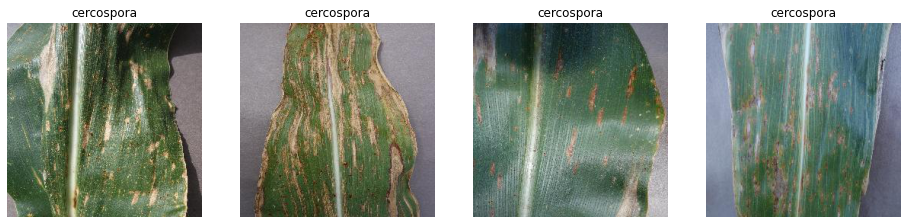

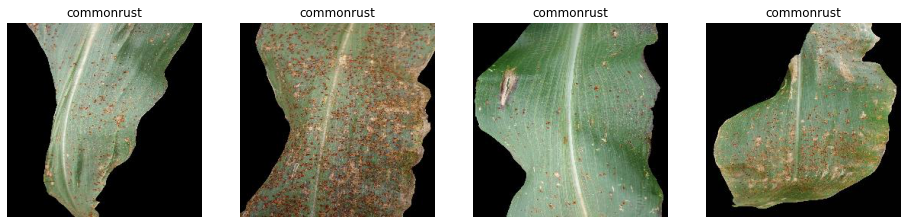

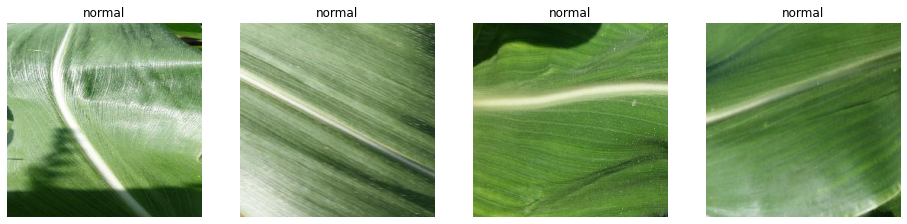

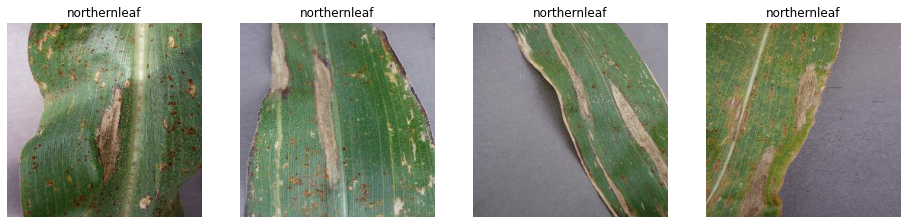

In [ ]:
cercospora_image = os.listdir(cercospora_dir)
commonrust_image = os.listdir(commonrust_dir)
normal_image = os.listdir(normal_dir)
northernleaf_image = os.listdir(northernleaf_dir)

fname1 = [os.path.join(cercospora_dir,fname)
        for fname in cercospora_image[:4]]

fname2 = [os.path.join(commonrust_dir,fname)
        for fname in commonrust_image[:4]]

fname3 = [os.path.join(normal_dir,fname)
        for fname in normal_image[:4]]

fname4 = [os.path.join(northernleaf_dir,fname)
        for fname in northernleaf_image[:4]]


ncolumns = 4
nrows = 2
fig = plt.gcf()
fig.set_size_inches(ncolumns*4,nrows*4)

for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('cercospora')
    plt.imshow(img)
plt.show()

ncolumns = 4
nrows = 2
fig = plt.gcf()
fig.set_size_inches(ncolumns*4,nrows*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('commonrust')
    plt.imshow(img)
    
plt.show()

ncolumns = 4
nrows = 2
fig = plt.gcf()
fig.set_size_inches(ncolumns*4,nrows*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('normal')
    plt.imshow(img)
    
plt.show()

ncolumns = 4
nrows = 2
fig = plt.gcf()
fig.set_size_inches(ncolumns*4,nrows*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('northernleaf')
    plt.imshow(img)
    
plt.show()

In [ ]:
train_dir = os.path.join('/content/drive/MyDrive/projek/dataset_split/train')
val_dir  = os.path.join('/content/drive/MyDrive/projek/dataset_split/val')
test_dir  = os.path.join('/content/drive/MyDrive/projek/dataset_split/test')

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data val
val_data = []
val_label = []
for r, d, f in os.walk(val_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (3080, 150, 150, 3)
Train Label =  (3080,)
Validation Data =  (730, 150, 150, 3)
Validation Label =  (730,)
Test Data =  (42, 150, 150, 3)
Test Label =  (42,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [209 196 204]
Data setelah di-normalisasi  [0.81960785 0.76862746 0.8       ]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal']
Label setelah di-encoder  [2 2 2 2 2 2 2 2 2 2]


## Augmentasi

In [ ]:
print("Train Data   = ", x_train.shape)
print("Train Label  = ", y_train.shape)
print("Val Data     = ", x_val.shape)
print("Val Label    = ", y_val.shape)
print("Test Data    = ", x_test.shape)
print("Test Label   = ", y_test.shape)

Train Data   =  (3080, 150, 150, 3)
Train Label  =  (3080,)
Val Data     =  (730, 150, 150, 3)
Val Label    =  (730,)
Test Data    =  (42, 150, 150, 3)
Test Label   =  (42,)


In [ ]:
# define generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale = 1./255
)

val_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size = 40

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 3080 images belonging to 4 classes.
Found 730 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [ ]:
# Feature Extraction Layer
model3 = Sequential()

model3.add(InputLayer(input_shape=[150,150,3]))

model3.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, padding='same'))

model3.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, padding='same'))

model3.add(Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, padding='same'))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, padding='same'))


In [ ]:
model3.add(Flatten())

In [ ]:
# Fully Connected Layer
model3.add(Dense(256, activation='relu')) #hidden
model3.add(Dropout(0.3))
model3.add(Dense(4, activation='softmax'))

In [ ]:
# Print model summary
print(model3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 19, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          1

In [ ]:
# Compile model 1
model3.compile(optimizer= Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
H3 = model3.fit(train_generator, epochs=100, validation_data = validation_generator)

Epoch 1/100
77/77 [==============================] - 40s 502ms/step - loss: 0.4437 - accuracy: 0.8227 - val_loss: 4.8066 - val_accuracy: 0.3356
Epoch 2/100
77/77 [==============================] - 38s 495ms/step - loss: 0.3210 - accuracy: 0.8737 - val_loss: 3.7660 - val_accuracy: 0.3370
Epoch 3/100
77/77 [==============================] - 39s 500ms/step - loss: 0.2648 - accuracy: 0.8925 - val_loss: 2.5635 - val_accuracy: 0.5918
Epoch 4/100
77/77 [==============================] - 39s 505ms/step - loss: 0.2403 - accuracy: 0.9052 - val_loss: 6.0136 - val_accuracy: 0.3507
Epoch 5/100
77/77 [==============================] - 39s 506ms/step - loss: 0.2190 - accuracy: 0.9192 - val_loss: 0.2530 - val_accuracy: 0.8945
Epoch 6/100
77/77 [==============================] - 39s 504ms/step - loss: 0.2216 - accuracy: 0.9091 - val_loss: 9.3212 - val_accuracy: 0.3151
Epoch 7/100
77/77 [==============================] - 39s 506ms/step - loss: 0.2397 - accuracy: 0.9055 - val_loss: 3.8915 - val_accuracy:

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/projek/model'

# simpan history model kedua
history_dict = H3.history
json.dump(history_dict, open(target_dir + '/history_MAIZE.json', 'w'))

# simpan model kedua dan weight-nya
model3.save(target_dir + '/model_MAIZE.h5')
model3.save_weights(target_dir + '/model_weights_MAIZE.h5')

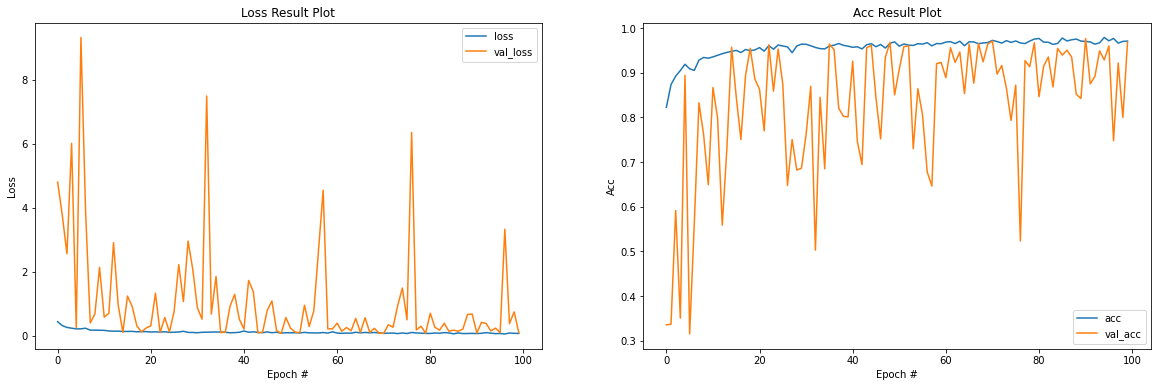

In [ ]:
#plot model 1
fig, (plt1, plt2) = plt.subplots(1,2, figsize=(20,6)) #buat bikin subplot

plt1.figsize=(10,8)
plt1.plot(np.arange(0, 100), H3.history["loss"], label="loss")
plt1.plot(np.arange(0, 100), H3.history["val_loss"], label="val_loss")
plt1.set_title("Loss Result Plot")
plt1.set_xlabel("Epoch #")
plt1.set_ylabel("Loss")
plt1.legend()

plt2.figsize=(10,8)
plt2.plot(np.arange(0, 100), H3.history["accuracy"], label="acc")
plt2.plot(np.arange(0, 100), H3.history["val_accuracy"], label="val_acc")
plt2.set_title("Acc Result Plot")
plt2.set_xlabel("Epoch #")
plt2.set_ylabel("Acc")
plt2.legend()

In [ ]:
#Evaluasi menggunakan classification report
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

ypred = model3.predict(validation_generator)
prediction = np.argmax(ypred, axis=1)
print(classification_report(validation_generator.classes, prediction))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        97
           1       1.00      1.00      1.00       226
           2       1.00      1.00      1.00       220
           3       0.91      0.97      0.94       187

    accuracy                           0.97       730
   macro avg       0.96      0.95      0.95       730
weighted avg       0.97      0.97      0.97       730



Model : model_MAIZE.h5
Predicted Label : cercospora
Probability : 0.2565



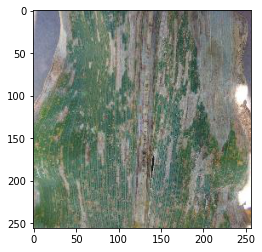

In [ ]:
from PIL import Image
from tensorflow.keras.models import load_model
img_upload = Image.open("/content/drive/MyDrive/projek/dataset_split/test/cercospora/5f00e4d0-e48c-4b6b-9602-022fd38cf7e7___RS_GLSp 7331.jpg")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['/content/drive/MyDrive/projek/model/model_MAIZE.h5']
labels = ['cercospora', 'commonrust','normal','nothernleaf']

for m in model_list:
    model = load_model(m)
    size_img = model3.layers[0].output_shape[1:3]
    imgs = cv2.resize(img, size_img)
    imgs = imgs.astype('float32') / 255
    pred = model3.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')